# Introduction

In a sport like Football, each player contributes to the team's success. It's important to understand the player's overall performance. In this report we will look into various factors that impact the player's overall performance.

In [1]:
import pandas as pd
import numpy as np

#to replace values in columns
import re

# To build and evaluate model
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor 
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score
from sklearn.model_selection import train_test_split

# to make plots
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

## 1. Business Understanding

1. Best players in various aspects?
2. Most preferred foot?
3. Effect of Football Foot on Player's Potential?
4. Does Age have an Impact on Potential?
5. Predicting Overall player's performance

## 2. Data Understanding
In this section, we load the data, check the data attributes for analysis

In [2]:
# Reading FIFA 2019 complete player dataset
data = pd.read_csv('/Users/prof.lock/Desktop/Data Science/data.csv')

In [3]:
# Sample Data
data.head()

,Unnamed: 0,ID,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,...,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
0,0,158023,L. Messi,31,https://cdn.sofifa.org/players/4/19/158023.png,Argentina,https://cdn.sofifa.org/flags/52.png,94,94,FC Barcelona,...,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0,€226.5M
1,1,20801,Cristiano Ronaldo,33,https://cdn.sofifa.org/players/4/19/20801.png,Portugal,https://cdn.sofifa.org/flags/38.png,94,94,Juventus,...,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0,€127.1M
2,2,190871,Neymar Jr,26,https://cdn.sofifa.org/players/4/19/190871.png,Brazil,https://cdn.sofifa.org/flags/54.png,92,93,Paris Saint-Germain,...,94.0,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0,€228.1M
3,3,193080,De Gea,27,https://cdn.sofifa.org/players/4/19/193080.png,Spain,https://cdn.sofifa.org/flags/45.png,91,93,Manchester United,...,68.0,15.0,21.0,13.0,90.0,85.0,87.0,88.0,94.0,€138.6M
4,4,192985,K. De Bruyne,27,https://cdn.sofifa.org/players/4/19/192985.png,Belgium,https://cdn.sofifa.org/flags/7.png,91,92,Manchester City,...,88.0,68.0,58.0,51.0,15.0,13.0,5.0,10.0,13.0,€196.4M


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18207 entries, 0 to 18206
Data columns (total 89 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Unnamed: 0                18207 non-null  int64  
 1   ID                        18207 non-null  int64  
 2   Name                      18207 non-null  object 
 3   Age                       18207 non-null  int64  
 4   Photo                     18207 non-null  object 
 5   Nationality               18207 non-null  object 
 6   Flag                      18207 non-null  object 
 7   Overall                   18207 non-null  int64  
 8   Potential                 18207 non-null  int64  
 9   Club                      17966 non-null  object 
 10  Club Logo                 18207 non-null  object 
 11  Value                     18207 non-null  object 
 12  Wage                      18207 non-null  object 
 13  Special                   18207 non-null  int64  
 14  Prefer

In [5]:
data.describe()

,Unnamed: 0,ID,Age,Overall,Potential,Special,International Reputation,Weak Foot,Skill Moves,Jersey Number,...,Penalties,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes
count,18207.000000,18207.000000,18207.000000,18207.000000,18207.000000,18207.000000,18159.000000,18159.000000,18159.000000,18147.000000,...,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000
mean,9103.000000,214298.338606,25.122206,66.238699,71.307299,1597.809908,1.113222,2.947299,2.361308,19.546096,...,48.548598,58.648274,47.281623,47.697836,45.661435,16.616223,16.391596,16.232061,16.388898,16.710887
std,5256.052511,29965.244204,4.669943,6.908930,6.136496,272.586016,0.394031,0.660456,0.756164,15.947765,...,15.704053,11.436133,19.904397,21.664004,21.289135,17.695349,16.906900,16.502864,17.034669,17.955119
min,0.000000,16.000000,16.000000,46.000000,48.000000,731.000000,1.000000,1.000000,1.000000,1.000000,...,5.000000,3.000000,3.000000,2.000000,3.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,4551.500000,200315.500000,21.000000,62.000000,67.000000,1457.000000,1.000000,3.000000,2.000000,8.000000,...,39.000000,51.000000,30.000000,27.000000,24.000000,8.000000,8.000000,8.000000,8.000000,8.000000
50%,9103.000000,221759.000000,25.000000,66.000000,71.000000,1635.000000,1.000000,3.000000,2.000000,17.000000,...,49.000000,60.000000,53.000000,55.000000,52.000000,11.000000,11.000000,11.000000,11.000000,11.000000
75%,13654.500000,236529.500000,28.000000,71.000000,75.000000,1787.000000,1.000000,3.000000,3.000000,26.000000,...,60.000000,67.000000,64.000000,66.000000,64.000000,14.000000,14.000000,14.000000,14.000000,14.000000
max,18206.000000,246620.000000,45.000000,94.000000,95.000000,2346.000000,5.000000,5.000000,5.000000,99.000000,...,92.000000,96.000000,94.000000,93.000000,91.000000,90.000000,92.000000,91.000000,90.000000,94.000000


## 3. Data Preparation
Clean Converting the data types into suitable types. Since Wage and Value cannot be str type. so we convert them to float.

Droping columns We drop all the columns which we do not need for any manupulations i.e from which data we cannot make out any thing.

In [6]:
data[data.columns[data.isna().any()]].isna().sum() # Gets the columns with na values and its count

Club                         241
Preferred Foot                48
International Reputation      48
Weak Foot                     48
Skill Moves                   48
                            ... 
GKHandling                    48
GKKicking                     48
GKPositioning                 48
GKReflexes                    48
Release Clause              1564
Length: 76, dtype: int64

In [7]:
# Majority of columns have 48 na values, check if they have common indices
print("The columns with 48 na values have same indices: {}"
      .format(data[data['Stamina'].isna()].index.tolist()==data[data['GKKicking'].isna()].index.tolist()))

The columns with 48 na values have same indices: True


In [8]:
data.drop(data[data['Stamina'].isna()].index.tolist(),inplace = True) # remove the indices that have na values 

In [9]:
# drop the columns which we do not need 
columns = ['Unnamed: 0','Photo','Flag','Club Logo','Release Clause','Nationality','ID','Club']
try:
    data.drop(data.columns[18:54],axis=1,inplace=True)
    data.drop(columns,axis=1,inplace=True)
except Exception as e:
    print(e)

In [10]:
replace = lambda x: re.sub("[€MK]","",x) # Wage and values in the columns are string like €10M,€1000K, use re

In [11]:
# convert the Wage and Value columns to float
data['Wage'] = data['Wage'].apply(replace).astype("float")
data['Value'] = data['Value'].apply(replace).astype("float")

### Best Player in Various Aspects?

In [12]:
# best players stores the players name, with their score
best_players = pd.DataFrame()
columns = data.columns.tolist()
# Preferred Foot, Name is dropped as iti cannot be considered as best player attribute
columns.remove("Preferred Foot") 
columns.remove("Name")
for column in columns:
    try:
        best_players= best_players.append(pd.DataFrame({"Name":data.loc[data[column].idxmax()]['Name'],"Score":data[column].max()},index=[column]))
    except Exception as e:
        print(e)

In [13]:
# Keeping only performnace indicators score of best players and dropping other columns
best_players.drop(['Special','Weak Foot','International Reputation','Age','Wage','Value'],axis=0)

,Name,Score
Overall,L. Messi,94.0
Potential,K. Mbappé,95.0
Skill Moves,Cristiano Ronaldo,5.0
Crossing,K. De Bruyne,93.0
Finishing,L. Messi,95.0
HeadingAccuracy,Naldo,94.0
ShortPassing,L. Modrić,93.0
Volleys,E. Cavani,90.0
Dribbling,L. Messi,97.0
Curve,Quaresma,94.0


### Most Preferred Foot?

Text(0.5, 1.0, 'Most Preferred Foot of the Players')

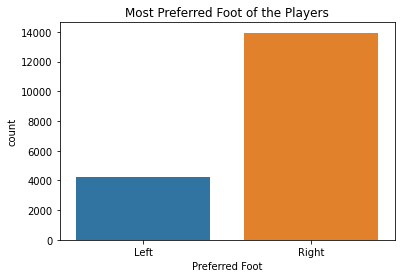

In [14]:
# plot counts, number of lefty and rigthy
sns.countplot(data['Preferred Foot'])
plt.title('Most Preferred Foot of the Players')

### Effect of Football Foot on Player's Potential?

Text(0.5, 1.0, 'Relation between Preferred Foot and Potential')

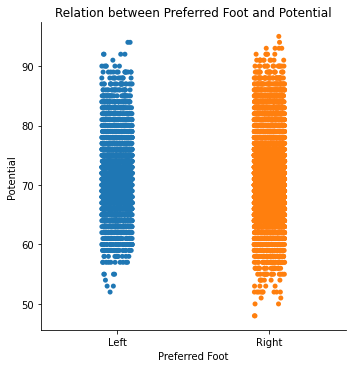

In [15]:
# plot to see the efefct on player potential based on lefty or rigthy
ax = sns.catplot(x="Preferred Foot",y="Potential",data=data)
plt.title("Relation between Preferred Foot and Potential")
# potential is hardly matters whetehr a player is lefty or righty

### Does Age have an Impact on Potential?

Text(0.5, 1.0, 'Age vs Potential')

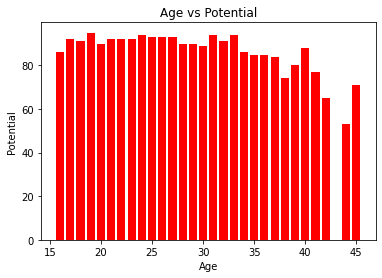

In [16]:
# bar-plot for Age and Potential
plt.bar(data['Age'],data['Potential'],color='red')
plt.xlabel('Age')
plt.ylabel('Potential')
plt.title("Age vs Potential")
# Potential falls with increase in age

## 4. Modeling 
Analyse the data, we build Linear regression and sees performing well. Predict the Player's Overall Performance

In [17]:
data.drop(['Name'],axis=1,inplace=True) # Name column is not required for Overall prediction

Text(0.5, 1.0, 'Overall correlation to Performance indicators')

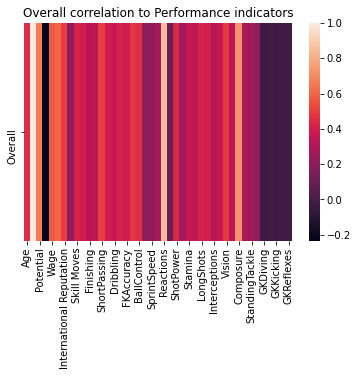

In [18]:
# Overall performance correlation with performance indicators
sns.heatmap(data.corr().loc[['Overall'],:]).set_title("Overall correlation to Performance indicators")

In [19]:
data = pd.get_dummies(data) # Preferred foot is a categorical value with Left/Right

In [20]:
# split the target and other columns and split them to train and test sets
X = data.drop(['Overall'],axis=1)
y = data[['Overall']]
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state = 42)

In [21]:
# Linear regression model 
lm = LinearRegression(normalize=True)
lm.fit(X_train,y_train)

LinearRegression(normalize=True)

In [22]:
# Predict the values for test X sample
y_pred = lm.predict(X_test)

In [23]:
# R squared error
score = r2_score(y_test,y_pred)
print(score)

0.9308032151252896


## 5. Evaluation 

Linear regression model performs well, we further analyse how RandomForestRegressor, DecisionTreeRegressor, Linear Regression and KNearestNeighbors perform on the data

In [24]:
def evaluation(clf,X_train=X_train,y_train=y_train,X_test=X_test,y_test=y_test):

    """
        Parameters:
            clf (Linear Regression,Random Forest,Decision Tree, KNearest Neighbours) : A machine learning model 
            X_train: train sample
            y_train: target train sample
            X_test: test sample
            y_test: target test sample
        
        Fits data into the model and predicts the target value on test sample,
        Evaluates the model using mean absolute error,mean squared error,  r2 score
    """
    print('\nModel : {}'.format(clf))
    
    clf.fit(X_train,y_train.values.ravel())
    y_pred =clf.predict(X_test)
    
    try:
        print('MSE : {}'.format(mean_squared_error(y_test,y_pred)))
        print('MAE : {}'.format(mean_absolute_error(y_test,y_pred)))
        print('R2 : {}'.format(r2_score(y_test,y_pred)))
    except Exception as e:
        print(e)

In [25]:
# knn,dt,rf,lr models
knn = KNeighborsRegressor(n_neighbors=7)
dt =  DecisionTreeRegressor(max_depth=7)
rf = RandomForestRegressor(max_depth=7)
lr = LinearRegression(normalize=True)

In [26]:
# Iterating and calling evaluate function on models
models = [knn,dt,rf,lr]
for i in models:
    evaluation(i)


Model : KNeighborsRegressor(n_neighbors=7)
MSE : 2.6967057748209413
MAE : 1.1889815397524648
R2 : 0.9429911957194479

Model : DecisionTreeRegressor(max_depth=7)
MSE : 1.0138042975737798
MAE : 0.7338371695636625
R2 : 0.9785680101556486

Model : RandomForestRegressor(max_depth=7)
MSE : 0.6294585128890213
MAE : 0.5543436144008576
R2 : 0.9866931433532454

Model : LinearRegression(normalize=True)
MSE : 3.2732377345148342
MAE : 1.4237673936428108
R2 : 0.9308032151252896


## 6. Conclusion

1. We saw various visualizatons, How age has an impact on player's potential?, Which player is best at what aspect?  How overall is related to performance indicators?
2. Random Forest peforms better on the data, then decision tree followed by K nearest neighbors and Linear regression